In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import logging
import matplotlib.pyplot as plt
import numpy as np

from hexagon_utilities import *
from colors import *
import plot_functions as pf
from hex_trees import *


# If one HexGrid is good, Two has to be Better!

My idea was insipired by something I read. About how 2 sets of hexagons (overlapping) led to "Islamic" designs and dodecahedrons. 

## 1. Start with 2 HexGrids. Move the centers around to see what comes up
## 2. Try Overlaps with Hexgrids of FLAT and POINTY Topped

In [25]:
#COL = YELLOWS_HIGH_SAT + GREENS_HIGH_SAT
#COL = BLACK_WHITES_LOW_SAT
COL = GREENS_HIGH_SAT + RED_BROWNS_HIGH_SAT


COL_SEQ = [#RED_BROWNS, 
           #GREENS, 
            BLACK_WHITES_LOW_SAT,
           BLUES, PINKS_LOW_SAT
            # GREENS, BROWNS]
            #           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]
            ]


#COL_SEQ = [mcolor_names]

COL1 = [RED_BROWNS, BLACK_WHITES_LOW_SAT,
           BLUES]# GREENS, BROWNS]
#           BEIGES, BLUES, ORANGES, CYANS, YELLOWS]


COL2 = [mcolor_names]

# Color Sequences along X or Y or Z coords

1. We create a Hex Grid
2. We sort it by (say) Y coords
3. We traverse this new list of Hexagon (along increasing Y coord) and face-color it per predefined color sequence.

(-53.51051177665153, 79.51051177665153, -19.815252187363008, 23.27935380250076)

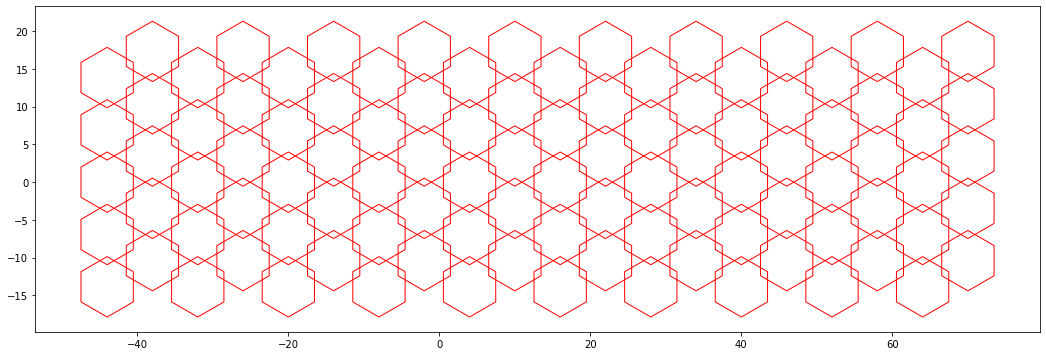

In [26]:
size=4
num_rows, num_cols = 10, 10
fig, ax = plt.subplots(figsize=(18,12))

hg = HexGrid(num_rows, num_cols, size, flat=True)

hx_centers = get_hexgrid_centers(hg)

for hc in hx_centers:
    h = Hex(*hc, size=4, flat=False)
    h.render(fc='none', color='r')
    
plt.axis('scaled')

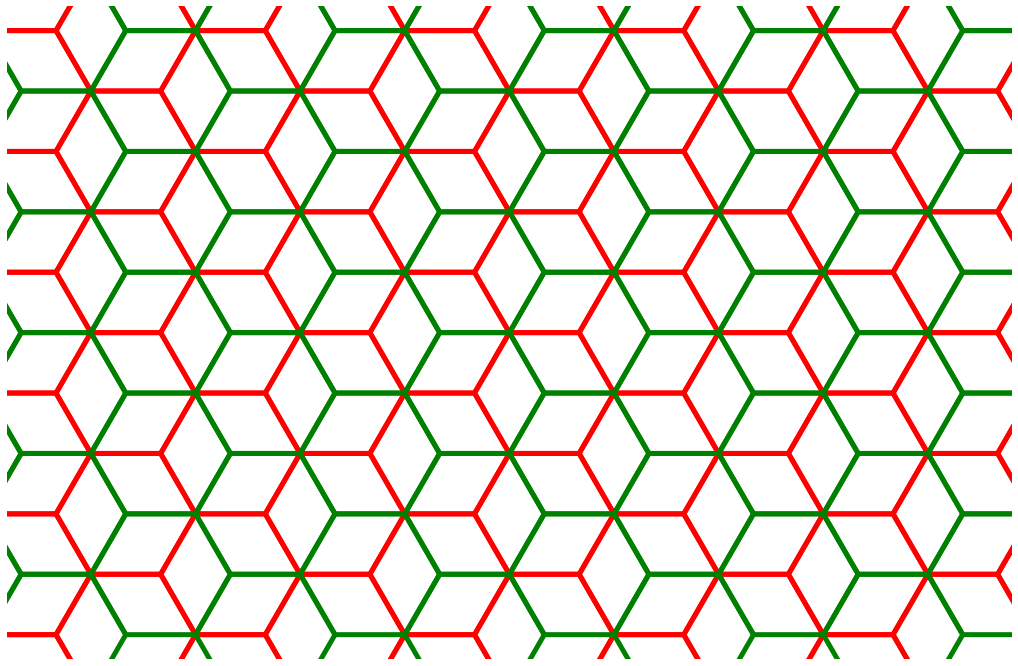

In [27]:
def draw_overlapping_grids(size, num_rows, 
                           num_cols,
                           color_family, color_family2,
                           bg_color='none'):
    
    nbk = '14A'
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))
    fig.patch.set_facecolor(bg_color)

    logging.info(f'num_rows {num_rows} num_cols {num_cols}, size {size}, bg {bg_color}')

    hg = HexGrid(num_rows, num_cols, size, flat=True)
    hg.render_grid(fc='none', color='r', lw=5)

    hg2 = HexGrid(num_rows, num_cols, size, xstart=size/2, ystart=hg.hlist[0].h/2, flat=True)
    hg2.render_grid(fc='none', color='g', lw=5)

#    hg3 = HexGrid(num_rows, num_cols, size, xstart=size/2, ystart=2*hg.hlist[0].h/3, flat=True)
#    hg3.render_grid(fc='none', color='b', lw=5)

    
    #Let's get hold of all the ORIGINAL Hex Centers...
    hx_centers = get_hexgrid_centers(hg)
    
        
        
        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.66
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip

    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    logging.info(f'x_range {x_range}, y_range {y_range}')
    pf.save_file(fig, 
                  f'3Grids_centers_offset',
                 nbk = 14, 
                 num_rows=num_rows, 
                 num_cols=num_cols, 
                )


    
    logging.info('Finished')

if __name__ == '__main__':
    
    size=4
    num_rows, num_cols = 13, 9
    color_family = RED_BROWNS
    color_family = get_rnd_family()
    color_family2 = get_rnd_family()
    color_family, color_family2 = GREYS, GREYS
    
    draw_overlapping_grids(size, num_rows, num_cols, color_family, color_family2)

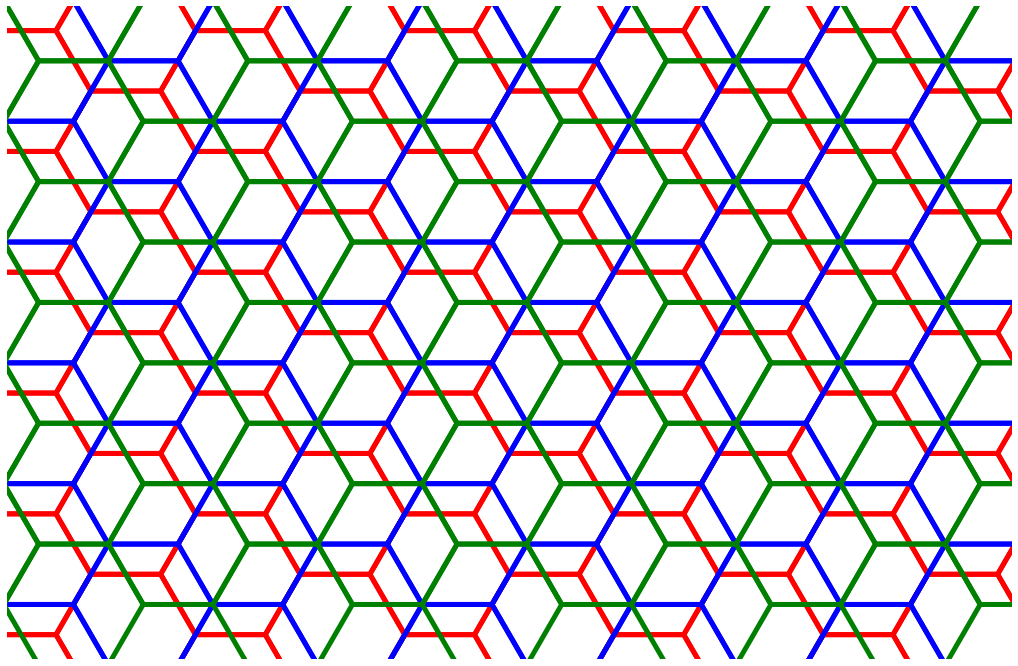

In [37]:
def draw_overlapping_grids(size, num_rows, 
                           num_cols,
                           color_family, color_family2,
                           bg_color='none'):
    
    nbk = '14A'
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))
    fig.patch.set_facecolor(bg_color)

    logging.info(f'num_rows {num_rows} num_cols {num_cols}, size {size}, bg {bg_color}')

    hg = HexGrid(num_rows, num_cols, size, flat=True)
    hg.render_grid(fc='none', color='r', lw=5)

    ystart = hg.hlist[0].h/4
    xstart = size/4
    hg2 = HexGrid(num_rows, num_cols, size, xstart=xstart, ystart=ystart, flat=True)
    hg2.render_grid(fc='none', color='b', lw=5)

    ystart = hg.hlist[0].h * 3/4
    xstart = 3*size/4
    hg2 = HexGrid(num_rows, num_cols, size, xstart=xstart, ystart=ystart, flat=True)
    hg2.render_grid(fc='none', color='g', lw=5)


    
    #Let's get hold of all the ORIGINAL Hex Centers...
    hx_centers = get_hexgrid_centers(hg)
    
        
        
        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.66
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip

    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    logging.info(f'x_range {x_range}, y_range {y_range}')
    pf.save_file(fig, 
                  f'3Grids_centers_offset',
                 nbk = 14, 
                 num_rows=num_rows, 
                 num_cols=num_cols, 
                )


    
    logging.info('Finished')

if __name__ == '__main__':
    
    size=4
    num_rows, num_cols = 13, 9
    color_family = RED_BROWNS
    color_family = get_rnd_family()
    color_family2 = get_rnd_family()
    color_family, color_family2 = GREYS, GREYS
    
    draw_overlapping_grids(size, num_rows, num_cols, color_family, color_family2)

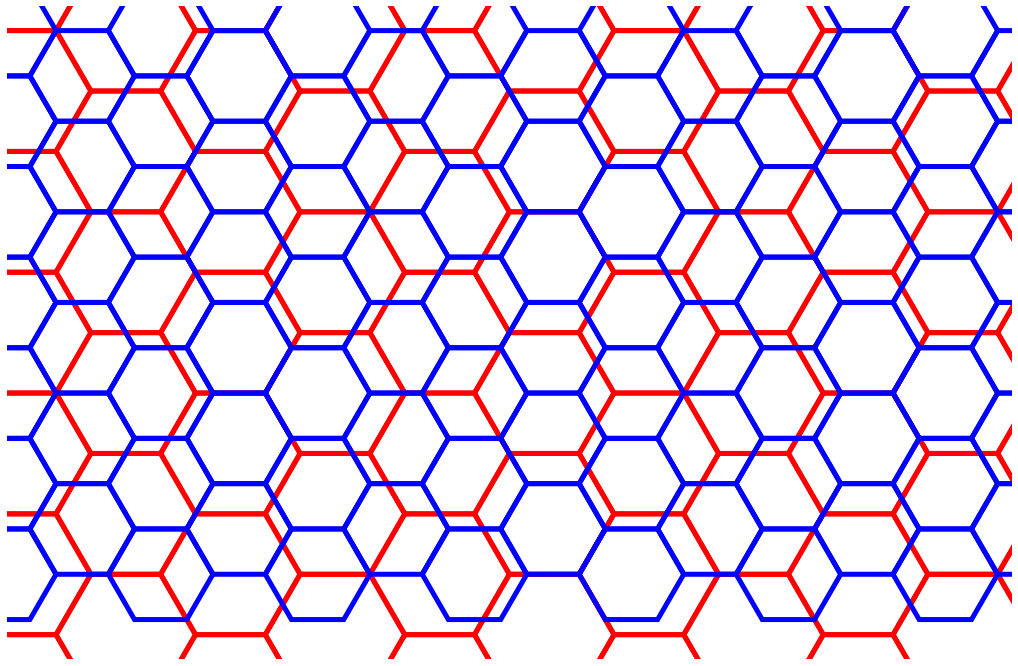

In [40]:
def draw_overlapping_grids(size, num_rows, 
                           num_cols,
                           color_family, color_family2,
                           bg_color='none'):
    
    nbk = '14A'
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))
    fig.patch.set_facecolor(bg_color)

    logging.info(f'num_rows {num_rows} num_cols {num_cols}, size {size}, bg {bg_color}')

    hg = HexGrid(num_rows, num_cols, size, flat=True)
    hg.render_grid(fc='none', color='r', lw=5)

    ystart = hg.hlist[0].h/4
    xstart = size/4
    size2 = size*3/4
    hg2 = HexGrid(num_rows, num_cols, size2, xstart=xstart, ystart=ystart, flat=True)
    hg2.render_grid(fc='none', color='b', lw=5)

#    ystart = hg.hlist[0].h * 3/4
#    xstart = 3*size/4
#    hg2 = HexGrid(num_rows, num_cols, size, xstart=xstart, ystart=ystart, flat=True)
#    hg2.render_grid(fc='none', color='g', lw=5)


    
    #Let's get hold of all the ORIGINAL Hex Centers...
    hx_centers = get_hexgrid_centers(hg)
    
        
        
        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.66
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip

    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    logging.info(f'x_range {x_range}, y_range {y_range}')
    pf.save_file(fig, 
                  f'3Grids_centers_offset',
                 nbk = 14, 
                 num_rows=num_rows, 
                 num_cols=num_cols, 
                )


    
    logging.info('Finished')

if __name__ == '__main__':
    
    size=4
    num_rows, num_cols = 13, 9
    color_family = RED_BROWNS
    color_family = get_rnd_family()
    color_family2 = get_rnd_family()
    color_family, color_family2 = GREYS, GREYS
    
    draw_overlapping_grids(size, num_rows, num_cols, color_family, color_family2)

In [29]:
hg.hlist[0].x,hg.hlist[0].y

(-44.0, -13.856406460551018)

In [30]:
h = hg.hlist[0]
h.get_verts()

[(-40.0, -13.856406460551018),
 (-42.0, -10.392304845413264),
 (-46.0, -10.392304845413262),
 (-48.0, -13.856406460551018),
 (-46.0, -17.32050807568877),
 (-42.0, -17.32050807568877)]

In [31]:
h.get_edge_midpoints()

[(-41.0, -12.12435565298214),
 (-44.0, -10.392304845413264),
 (-47.0, -12.124355652982139),
 (-47.0, -15.588457268119894),
 (-44.0, -17.32050807568877),
 (-41.0, -15.588457268119894)]